In [1]:
import pandas as pd
import numpy as np

from exchange import *
from agents import *

import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

# Exchange Visualization

In [2]:
e = Exchange()

e.add_bid(100, 5, "1", None)
e.add_bid(102, 2, "2", None)
e.add_bid(103, 3, "3", None)
e.add_bid(104, 4, "4", None)
e.add_bid(105, 10, "5", None)
e.add_ask(106, 8, "6", None)
e.add_ask(107, 3, "7", None)
e.add_ask(109, 12, "8", None)
e.add_ask(110, 6, "9", None)
e.add_ask(115, 4, "10", None)

In [3]:
def show_exchange(exchange):
    bidPrices = list(exchange.bids.keys())
    bidQtys = list(exchange.bids.values())
    askPrices = list(exchange.asks.keys())
    askQtys = list(exchange.asks.values())

    plt.figure(figsize=(3, 5))
    plt.barh(bidPrices, bidQtys, color="green", label=f"bid qty: {sum(bidQtys)}")
    plt.barh(askPrices, askQtys, color="red", label=f"ask qty: {sum(askQtys)}")
    plt.legend()
    plt.ylabel("price")
    plt.xlabel("qty")
    plt.title("Exchange Ladder")

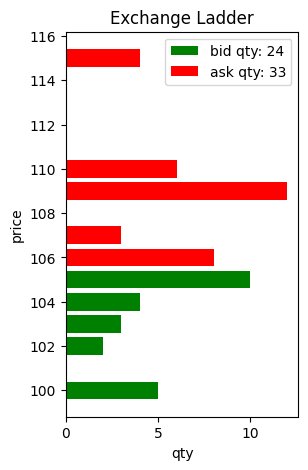

In [4]:
show_exchange(e)

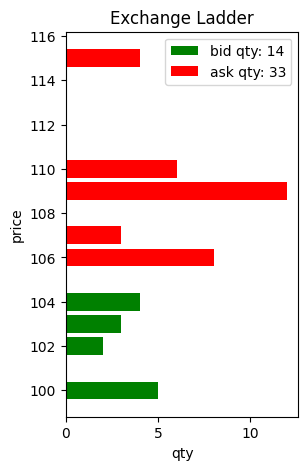

In [5]:
e.add_ask(105, 10, "11", None)
show_exchange(e)

# Simulation Elements

In [6]:
'''
# TODO: agent arrival process
# TODO: agent cancel duration
# TODO: true price movement changing (variance over time)
# TODO: agent reading true price (with some noise)
# TODO: agent aggression level (bid / ask)
# TODO: agent interaction logic with exchange
'''


'\n# TODO: agent arrival process\n# TODO: agent cancel duration\n# TODO: true price movement changing (variance over time)\n# TODO: agent reading true price (with some noise)\n# TODO: agent aggression level (bid / ask)\n# TODO: agent interaction logic with exchange\n'

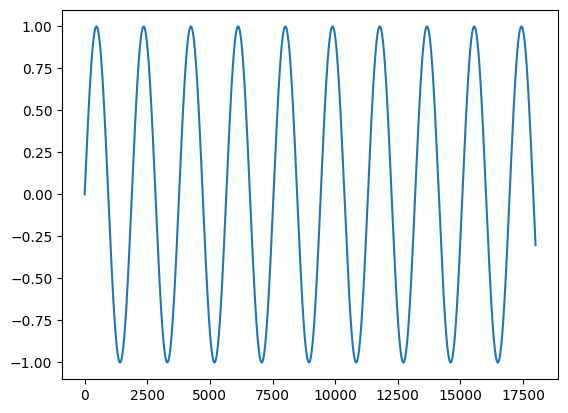

In [7]:
x = np.arange(0, 5 * 60 * 60)
T = 60 * 5 # period
y = np.sin(x / T)
plt.plot(x, y)

In [8]:
t = 40
true_price = np.sin(t / T)
true_price

0.13293862262231407

In [9]:
e.asks

defaultdict(<function exchange.Exchange.add_ask.<locals>.<lambda>()>,
            {106: 8, 107: 3, 109: 12, 110: 6, 115: 4})

In [10]:
e.ask_customers

{'6': (106, 0, 8, None),
 '7': (107, 0, 3, None),
 '8': (109, 0, 12, None),
 '9': (110, 0, 6, None),
 '10': (115, 0, 4, None)}

side A
order 99 17


side AB
order 102 6
spread 4


side AB
order 96 4
spread 6


side A
order 103 17


side B
order 99 15




RecursionError: maximum recursion depth exceeded while calling a Python object

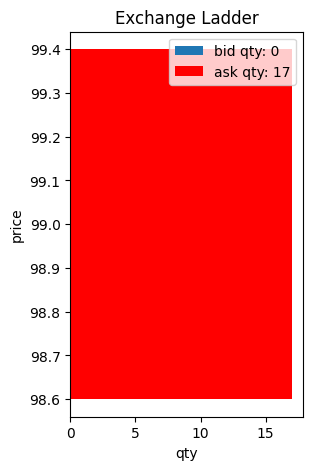

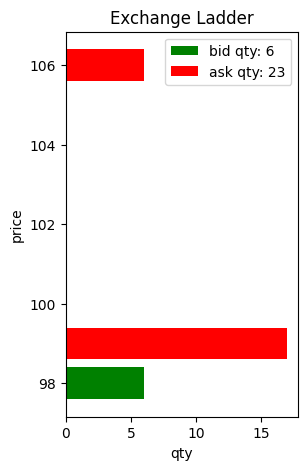

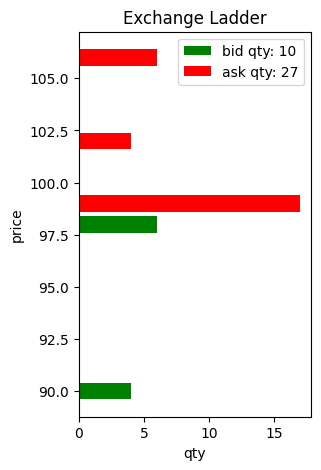

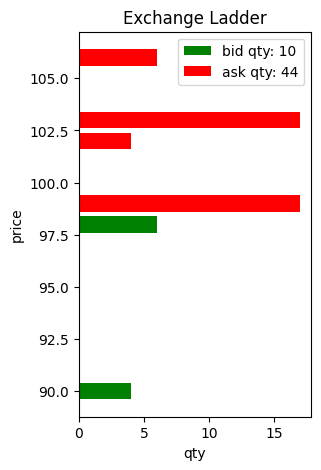

In [11]:
# pre-determine some true price curve as a function of time
# can begin as uniform
random.seed(88)
e = Exchange()

### defining hyperparameters ###
agent_arrival_rate = 10
taker_probability = 0.4
true_price_func = lambda t: np.sin(t / 5*60)
temp_true_val = 100

while e.get_timestamp() < 100: 
    customer_id = 1
    
    ### pseudo code this ###

    # agent arrives by some exponential inter-arrival time simulating poisson
    # increment timestamp by exponential variable
    # calculate agent's characteristics (aggression level, theo value, cancel duration)
    # first check existing cancel queue, remove orders if necessary
    # add agent's bid/asks to exchange
    # plot exchange
    # sidenote: also need to increment customerids

    # add in own policy logic 

    ### ------------------------------------------------------------ ###

    # agents arrive at same rate, some probability they are maker vs taker
    agent_arrival_time = random.expovariate(agent_arrival_rate)

    order_duration_sd = 0.0 # placeholder
    theo_sd = 2.5
    agent_is_taker = random.random() < taker_probability
    if not agent_is_taker:
        mvn_skews = [8, 0]
        mvn_means = [2, 10]
        mvn_cov = [[9, -5.625], [-5.625, 6.25]]

        a = Maker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, temp_true_val, customer_id)
    
    else: 
        mvn_skews = [8, 0]
        mvn_means = [2, 20]
        mvn_cov = [[9, -9], [-9, 16]]
        
        a = Taker((mvn_skews, mvn_means, mvn_cov), order_duration_sd, theo_sd, temp_true_val, customer_id)

    print("side", a.get_side())
    print("order", a.get_theo(), a.get_order_quantity())
    if not agent_is_taker:
        print("spread", a.get_spread())
    print("\n")
    e.add_order(a)

    show_exchange(e)

    # check cancelled orders
    for cid in e.ask_customers.keys():
        curr_time = e.get_timestamp()
        curr_agent = e.ask_customers[cid][3]
        order_time = e.ask_customers[cid][1]
        if curr_time > curr_agent.get_order_duration() + order_time:
            e.remove_ask(cid)
        
    for cid in e.bid_customers.keys():
        curr_time = e.get_timestamp()
        curr_agent = e.bid_customers[cid][3]
        order_time = e.bid_customers[cid][1]
        if curr_time > curr_agent.get_order_duration() + order_time:
            e.remove_bid(cid)

    customer_id += 1
    e.increment_timestamp(agent_arrival_time)

In [ ]:
show_exchange(e)